<a href="https://colab.research.google.com/github/ganeshap1995/Bharatintern/blob/main/Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

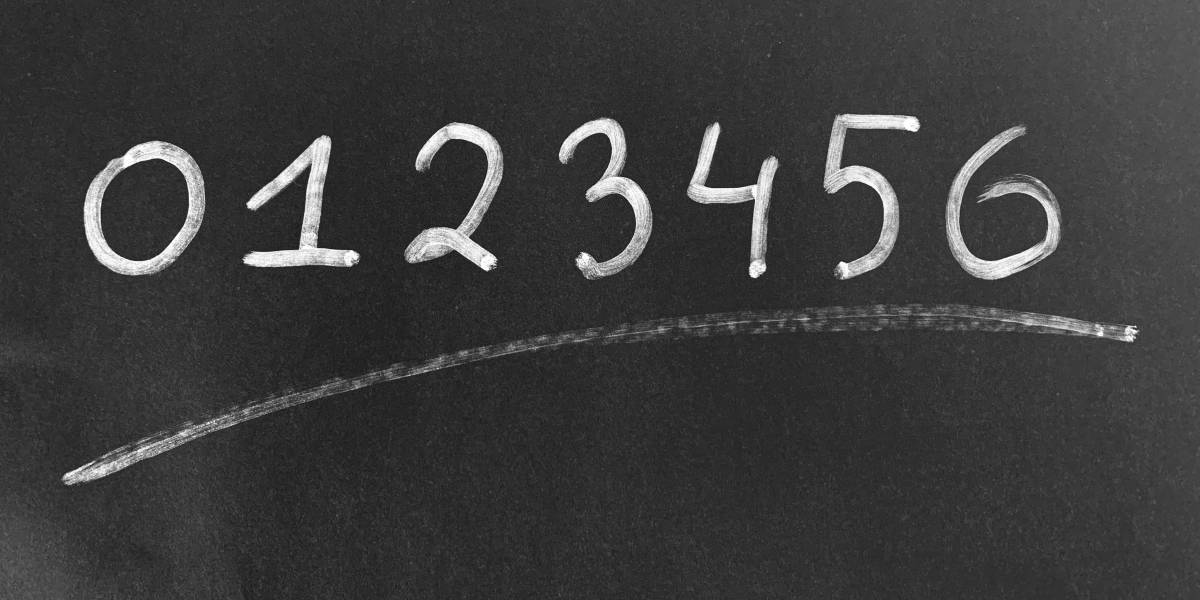

#**Title:** "Titanic Classification."
#**Project Description:** Handwritten digit recognition system not only detects scanned images of handwritten digits.Handwritten digit recognition using MNIST dataset is a major project made with the help of Neural Network. It basically detects the scanned images of handwritten digits.

##Importing libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

##Prepare Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

11490434/11490434 [==============================] - 0s 0us/step
TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


##Create Model

In [3]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

##Compile Model

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          9

##Train Model

In [6]:
epochs = 10
history = model.fit(
  train_images,
  train_labels,
  epochs = epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 270s 143ms/step - loss: 0.1402 - accuracy: 0.9556
Epoch 2/10
1875/1875 [==============================] - 245s 131ms/step - loss: 0.0464 - accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 251s 134ms/step - loss: 0.0330 - accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 247s 132ms/step - loss: 0.0264 - accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 244s 130ms/step - loss: 0.0220 - accuracy: 0.9932
Epoch 6/10
1875/1875 [==============================] - 246s 131ms/step - loss: 0.0179 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 244s 130ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 8/10
1875/1875 [==============================] - 240s 128ms/step - loss: 0.0132 - accuracy: 0.9957
Epoch 9/10
1875/1875 [==============================] - 245s 131ms/step - loss: 0.0122 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 

##Visualize Training Results

Text(0.5, 1.0, 'Training Accuracy and Loss')

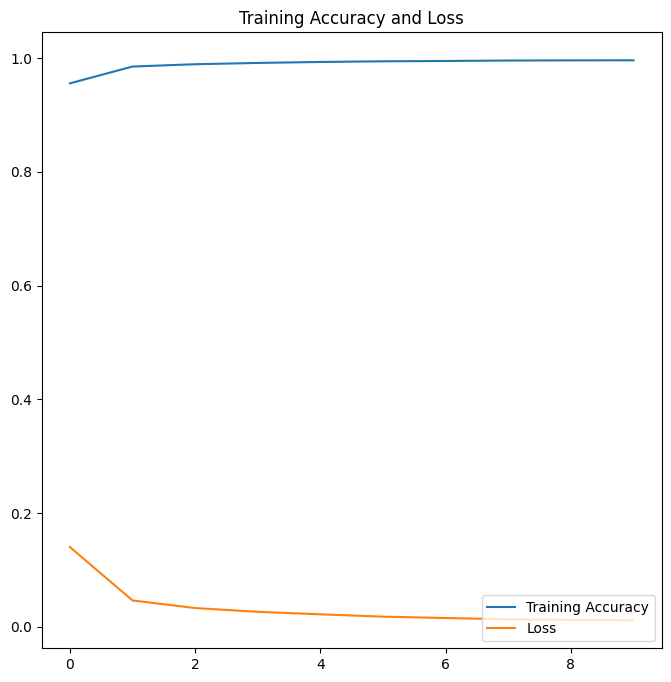

In [7]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')

##Test Image

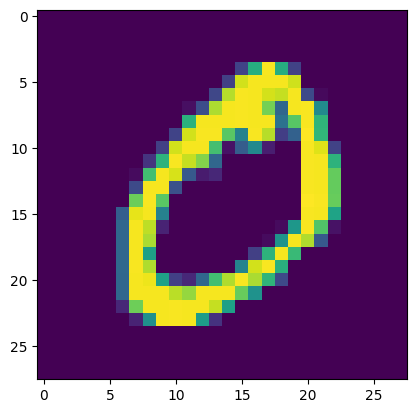

Prediction of model: 0


In [14]:
image = (train_images[1]).reshape(1, 28, 28, 1)
model_pred = model.predict(image, verbose=0)
predicted_class = np.argmax(model_pred)

plt.imshow(image.reshape(28, 28))
plt.show()

print('Prediction of model: {}'.format(predicted_class))

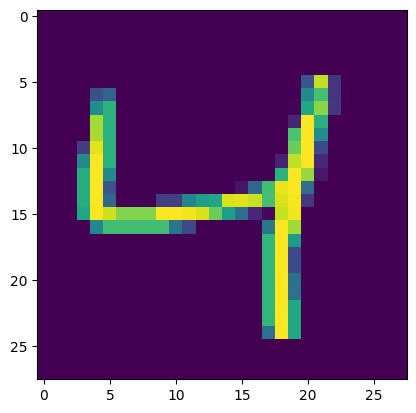

Prediction of model: 4


In [11]:
image = (train_images[2]).reshape(1, 28, 28, 1)
model_pred = model.predict(image, verbose=0)
predicted_class = np.argmax(model_pred)

plt.imshow(image.reshape(28, 28))
plt.show()

print('Prediction of model: {}'.format(predicted_class))

##Test Multiple Image

Test images array shape: (4, 28, 28)
1/1 [==============================] - 0s 56ms/step
Predicted digit: 2
1/1 [==============================] - 0s 116ms/step
Predicted digit: 1
1/1 [==============================] - 0s 31ms/step
Predicted digit: 0
1/1 [==============================] - 0s 25ms/step
Predicted digit: 4


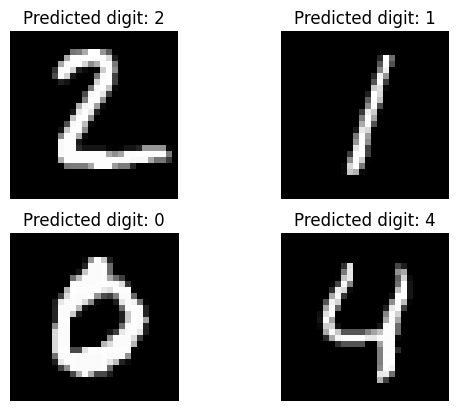

In [13]:
images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print("Test images array shape: {}".format(images.shape))

for i, test_image in enumerate(images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1, 28, 28, 1)
    prediction = model.predict(test_image)
    predicted_class = np.argmax(prediction)

    print("Predicted digit: {}".format(predicted_class))
    plt.subplot(220 + i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(predicted_class))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

##Save Model

In [15]:
model.save("tf-cnn-model.h5")

##Load Model

In [16]:
loaded_model = models.load_model("tf-cnn-model.h5")

1/1 [==============================] - 0s 377ms/step


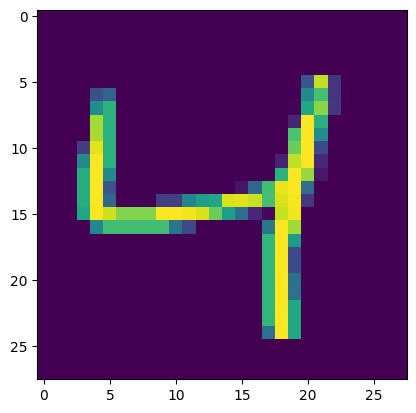

Prediction of model: 4


In [18]:
image = (train_images[2]).reshape(1, 28, 28, 1)
model_pred = loaded_model.predict(image)
predicted_class = np.argmax(model_pred)

plt.imshow(image.reshape(28, 28))
plt.show()

print('Prediction of model: {}'.format(predicted_class))